<a href="https://colab.research.google.com/github/sathwikreddykatla/tutorial/blob/master/2105A42010_assign_3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

[[ 3  3  2]
 [ 2  3 -2]]
U:  [[-0.7815437 -0.6238505]
 [-0.6238505  0.7815437]]
Singular array [5.54801894 2.86696457]
V^{T} [[-0.64749817 -0.7599438  -0.05684667]
 [-0.10759258  0.16501062 -0.9804057 ]
 [-0.75443354  0.62869461  0.18860838]]
[[ 0.11462451  0.04347826]
 [ 0.07114625  0.13043478]
 [ 0.22134387 -0.26086957]]


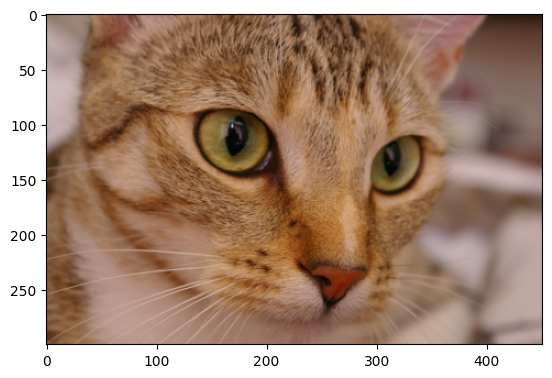

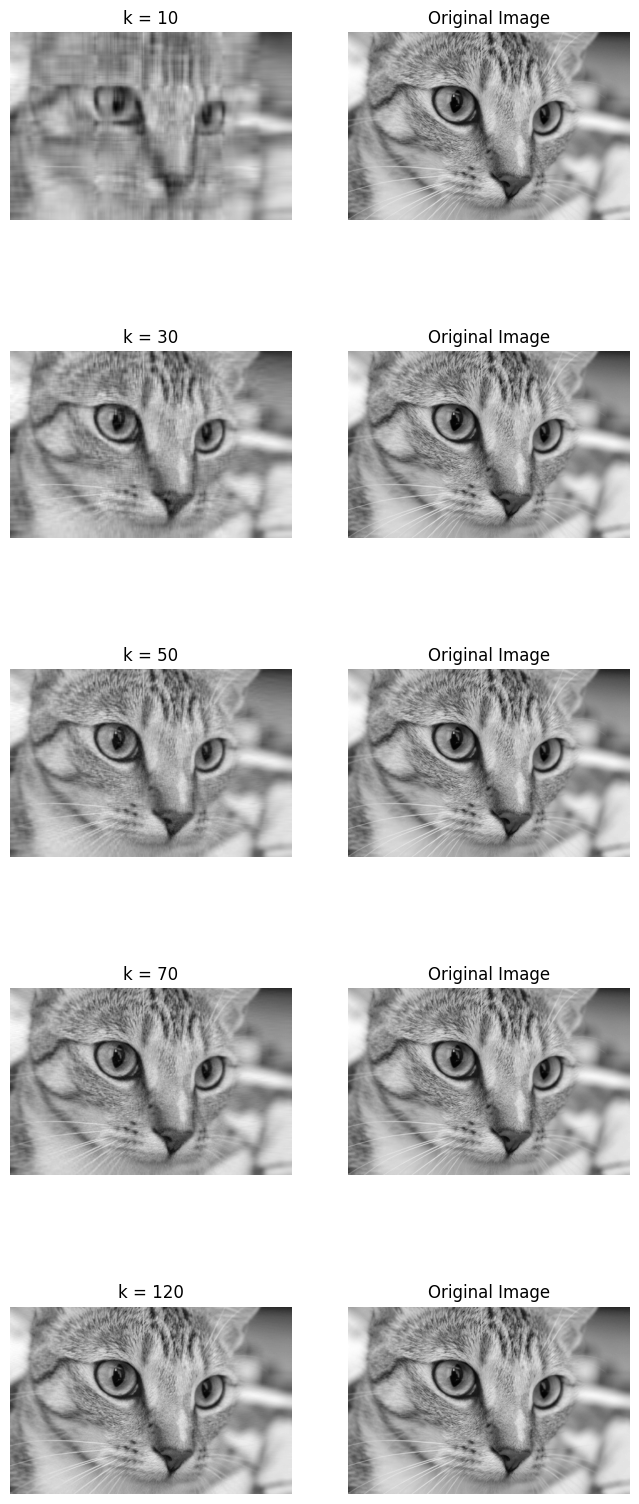

In [2]:
from skimage.color import rgb2gray
from skimage import data
import matplotlib.pyplot as plt
import numpy as np
from scipy.linalg import svd

# Singular Value Decomposition
# define a matrix
X = np.array([[3, 3, 2], [2, 3, -2]])
print(X)
# perform SVD
U, singular, V_transpose = svd(X)
# print different components
print("U: ", U)
print("Singular array", singular)
print("V^{T}", V_transpose)

#Calculate Pseudo inverse
# inverse of singular matrix is just the reciprocal of each element
singular_inv = 1.0 / singular
# create m x n matrix of zeroes and put singular values in it
s_inv = np.zeros(X.shape)
s_inv[0][0] = singular_inv[0]
s_inv[1][1] = singular_inv[1]
# calculate pseudoinverse
M = np.dot(np.dot(V_transpose.T, s_inv.T), U.T)
print(M)

#SVD on image compression


cat = data.chelsea()
plt.imshow(cat)
# convert to grayscale
gray_cat = rgb2gray(cat)

# calculate the SVD and plot the image
U, S, V_T = svd(gray_cat, full_matrices=False)
S = np.diag(S)
fig, ax = plt.subplots(5, 2, figsize=(8, 20))

curr_fig = 0
for r in [10, 30, 50, 70, 120]:
    cat_approx = U[:, :r] @ S[0:r, :r] @ V_T[:r, :]
    ax[curr_fig][0].imshow(cat_approx, cmap='gray')
    ax[curr_fig][0].set_title("k = "+str(r))
    ax[curr_fig, 0].axis('off')
    ax[curr_fig][1].set_title("Original Image")
    ax[curr_fig][1].imshow(gray_cat, cmap='gray')
    ax[curr_fig, 1].axis('off')
    curr_fig += 1
plt.show()